In [1]:
#!pip install geopy
import matplotlib.pyplot as plt
import numpy as np
import math
import geopy.distance

In [2]:
import gtfs_kit  as gk

trans=(gk.read_feed("gtfs.zip", dist_units="km"))

In [3]:
trans.validate()

,type,message,table,rows
3,error,Invalid route_type; maybe has extra space char...,routes,"[281, 282, 283, 284, 285, 286, 287, 288, 289, ..."
0,warning,Unrecognized column feed_id,feed_info,[]
1,warning,Unrecognized column feed_ext_version,feed_info,[]
2,warning,Unrecognized column route_sort_order,routes,[]
4,warning,"Repeated pair (route_short_name, route_long_name)",routes,"[299, 319, 356, 357, 358, 360, 361, 363, 365, ..."
5,warning,Route has no trips,routes,"[280, 358, 359]"
9,warning,"Repeated pair (trip_id, departure_time)",stop_times,"[24, 45, 113, 173, 291, 349, 409, 527, 645, 76..."
6,warning,Unrecognized column location_sub_type,stops,[]
7,warning,Unrecognized column stop_direction,stops,[]
8,warning,Stop has no stop times,stops,"[0, 1, 2, 3, 4, 6, 8, 9, 11, 13, 18, 27, 58, 6..."


In [4]:
trans.describe()

,indicator,value
0,agencies,"[BKK, MÁV-HÉV]"
1,timezone,Europe/Budapest
2,start_date,20221106
3,end_date,20230101
4,num_routes,372
5,num_trips,304359
6,num_stops,6090
7,num_shapes,1965
8,sample_date,20221110
9,num_routes_active_on_sample_date,351


In [5]:
import gtfs_functions as gtfs
routes, stops, stop_times, trips, shapes = gtfs.import_gtfs("GTFS.zip")

In [6]:
x=[]
y=[]
for i in range(len(stops)):
    x.append(stops["geometry"][i].y)
    y.append(stops["geometry"][i].x)

In [7]:
y=stops["geometry"][0].x

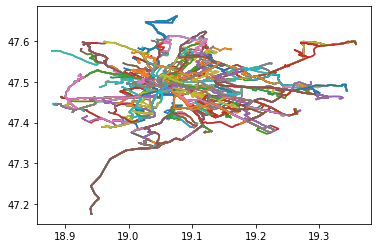

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(1300):
    x,y=shapes["geometry"][i].coords.xy
    plt.plot(x,y)
plt.show()

In [9]:
I_building=(47.47282880598328, 19.060057869533754)
radius=(47.46980543001353, 19.05407442774218)

In [10]:
geopy.distance.geodesic(I_building, (x[0],y[0]))

Distance(4068.9079236653174)

In [11]:
print("stops that are in a 600m radius of Building I at BME: ")
stops_600=[]
for i,k in enumerate(stops["geometry"]):
    if geopy.distance.geodesic(I_building, (k.y,k.x)).m <600.0:
        print("\t-",stops["stop_id"][i])
        stops_600.append(stops["stop_id"][i])

stops that are in a 600m radius of Building I at BME: 
	- 008280
	- 009179
	- 049597
	- 062607
	- 062608
	- 062620
	- 062621
	- 062622
	- 066451
	- 066452
	- 066453
	- 066454
	- 071262
	- F01986
	- F01988
	- F01989
	- F01990
	- F01991
	- F01992
	- F02153
	- F02155
	- F02222
	- F02224
	- F02225


In [12]:
#Stops that are in a 600m radius
stops_I=stops[stops["stop_id"].isin(stops_600)]
stops_I.reset_index(drop=True, inplace=True)

In [13]:
#stops_I

In [14]:
#19.200299 in shapes["geometry"][0].coords.xy[0]


In [15]:
#stops_I["geometry"][0].x

In [16]:
shapes_within_i=[]
for j,i in enumerate(shapes["geometry"]):
    for k in stops_I["geometry"]:
        if k.x in i.coords.xy[0] and k.y in i.coords.xy[1]:
            shapes_within_i.append(shapes["shape_id"][j])
            print("ez az útvonal jó")

ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal jó
ez az útvonal 

In [17]:
len(set(shapes_within_i))

58

In [18]:
shapes_I=shapes[shapes["shape_id"].isin(shapes_within_i)]
shapes_I.reset_index(drop=True, inplace=True)
shapes_I

,shape_id,geometry
0,0976,"LINESTRING (19.04686 47.47404, 19.04688 47.474..."
1,0977,"LINESTRING (19.02519 47.50723, 19.02518 47.507..."
2,2064,"LINESTRING (19.07132 47.49604, 19.07127 47.496..."
3,AH19,"LINESTRING (19.06299 47.46985, 19.06299 47.469..."
4,B692,"LINESTRING (19.04835 47.47750, 19.04834 47.477..."
5,B693,"LINESTRING (19.02519 47.50723, 19.02518 47.507..."
6,B824,"LINESTRING (19.07134 47.49607, 19.07132 47.496..."
7,BM08,"LINESTRING (19.08126 47.50041, 19.08131 47.500..."
8,BM09,"LINESTRING (19.05793 47.46850, 19.05737 47.468..."
9,DO19,"LINESTRING (19.04686 47.47404, 19.04688 47.474..."


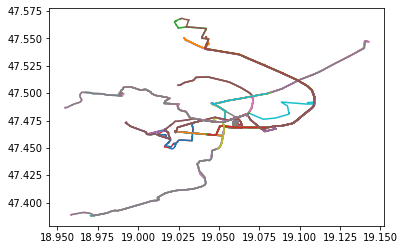

In [19]:
for i in shapes_I["geometry"]:
    x,y=i.coords.xy
    plt.plot(x,y)
    plt.scatter(I_building[1], I_building[0])
plt.show()

In [20]:
shapes_I

,shape_id,geometry
0,0976,"LINESTRING (19.04686 47.47404, 19.04688 47.474..."
1,0977,"LINESTRING (19.02519 47.50723, 19.02518 47.507..."
2,2064,"LINESTRING (19.07132 47.49604, 19.07127 47.496..."
3,AH19,"LINESTRING (19.06299 47.46985, 19.06299 47.469..."
4,B692,"LINESTRING (19.04835 47.47750, 19.04834 47.477..."
5,B693,"LINESTRING (19.02519 47.50723, 19.02518 47.507..."
6,B824,"LINESTRING (19.07134 47.49607, 19.07132 47.496..."
7,BM08,"LINESTRING (19.08126 47.50041, 19.08131 47.500..."
8,BM09,"LINESTRING (19.05793 47.46850, 19.05737 47.468..."
9,DO19,"LINESTRING (19.04686 47.47404, 19.04688 47.474..."


In [21]:
trips_I=trips[trips["shape_id"].isin(shapes_I["shape_id"])]
trips_I.drop_duplicates(subset=["route_id"])

,trip_id,route_id,service_id,direction_id,shape_id
1446,C34268105116,3060,C34268REHHKMK-011,1,B692
1484,C34268120869,3040,C34268REHHKMK-011,0,0977
7436,C50522131,1530,C50522AHCKVA-011,1,DX77
7440,C505221645,1540,C50522AHCKVA-011,1,RM50
16250,C530791140,9180,C53079AHPMAA-021,1,VN42
18201,C537446103J,3410,C53744AHCPJ-0051,1,TL38
20469,C540151008,1335,C54015TOHCMAA-011,0,SB39
24651,C5450110,1070,C54501AHCWA-0011,0,BM09
31736,C547346553,2120,C54734AHCCsZ-031,1,QH60
31743,C547346581,2121,C54734AHCCsZ-031,0,XD69


In [22]:
routes_I=routes[routes["route_id"].isin(trips_I["route_id"])]


In [23]:
routes_I=routes_I.iloc[:-2]

In [24]:
routes_I

,agency_id,route_id,route_short_name,route_long_name,route_type,route_desc,route_color,route_text_color,route_sort_order
28,BKK,0330,33,NaN,3,"Móricz Zsigmond körtér M / Nagytétény, ipartelep",009EE3,FFFFFF,59
85,BKK,1070,107,NaN,3,BudaPart / Keleti pályaudvar M,009EE3,FFFFFF,158
114,BKK,1335,133E,NaN,3,"Újpalota, Nyírpalota út / Nagytétény, Erdélyi ...",009EE3,FFFFFF,188
135,BKK,1530,153,NaN,3,Infopark (Pázmány Péter sétány) / Gazdagréti tér,009EE3,FFFFFF,209
136,BKK,1540,154,NaN,3,BudaPart / Gazdagréti tér,009EE3,FFFFFF,210
184,BKK,2120,212,NaN,3,"Boráros tér H / Normafa, látogatóközpont",009EE3,FFFFFF,258
185,BKK,2121,212A,NaN,3,Boráros tér H / Svábhegy,009EE3,FFFFFF,259
186,BKK,2122,212B,NaN,3,"Boráros tér H / Csillebérc, KFKI",009EE3,FFFFFF,260
240,BKK,3010,1,NaN,0,Kelenföld vasútállomás M / Bécsi út / Vörösvár...,FFD800,000000,14
246,BKK,3040,4,NaN,0,Széll Kálmán tér M / Újbuda-központ M,FFD800,000000,22


In [25]:
import pandas as pd
routes_I.to_csv("nappali_utak.csv",index=False )

In [26]:
routes_I.groupby(["route_desc"])

In [27]:
shapes_I

,shape_id,geometry
0,0976,"LINESTRING (19.04686 47.47404, 19.04688 47.474..."
1,0977,"LINESTRING (19.02519 47.50723, 19.02518 47.507..."
2,2064,"LINESTRING (19.07132 47.49604, 19.07127 47.496..."
3,AH19,"LINESTRING (19.06299 47.46985, 19.06299 47.469..."
4,B692,"LINESTRING (19.04835 47.47750, 19.04834 47.477..."
5,B693,"LINESTRING (19.02519 47.50723, 19.02518 47.507..."
6,B824,"LINESTRING (19.07134 47.49607, 19.07132 47.496..."
7,BM08,"LINESTRING (19.08126 47.50041, 19.08131 47.500..."
8,BM09,"LINESTRING (19.05793 47.46850, 19.05737 47.468..."
9,DO19,"LINESTRING (19.04686 47.47404, 19.04688 47.474..."


In [28]:
routes_I

,agency_id,route_id,route_short_name,route_long_name,route_type,route_desc,route_color,route_text_color,route_sort_order
28,BKK,0330,33,NaN,3,"Móricz Zsigmond körtér M / Nagytétény, ipartelep",009EE3,FFFFFF,59
85,BKK,1070,107,NaN,3,BudaPart / Keleti pályaudvar M,009EE3,FFFFFF,158
114,BKK,1335,133E,NaN,3,"Újpalota, Nyírpalota út / Nagytétény, Erdélyi ...",009EE3,FFFFFF,188
135,BKK,1530,153,NaN,3,Infopark (Pázmány Péter sétány) / Gazdagréti tér,009EE3,FFFFFF,209
136,BKK,1540,154,NaN,3,BudaPart / Gazdagréti tér,009EE3,FFFFFF,210
184,BKK,2120,212,NaN,3,"Boráros tér H / Normafa, látogatóközpont",009EE3,FFFFFF,258
185,BKK,2121,212A,NaN,3,Boráros tér H / Svábhegy,009EE3,FFFFFF,259
186,BKK,2122,212B,NaN,3,"Boráros tér H / Csillebérc, KFKI",009EE3,FFFFFF,260
240,BKK,3010,1,NaN,0,Kelenföld vasútállomás M / Bécsi út / Vörösvár...,FFD800,000000,14
246,BKK,3040,4,NaN,0,Széll Kálmán tér M / Újbuda-központ M,FFD800,000000,22


In [29]:
stop_7=stop_times[stop_times["arrival_time"]<28200]
stop_7=stop_7[stop_7["arrival_time"]>26100]


In [30]:
stop_7

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,...,direction_id,shape_id,stop_name,stop_code,location_type,location_sub_type,parent_station,wheelchair_boarding,stop_direction,geometry
102,C041837,F04526,27000.0,27000.0,0,NaN,NaN,NaN,0.0,8140,...,1,Y702,"Soroksár, Molnár-sziget",NaN,NaN,NaN,NaN,2.0,NaN,POINT (19.10869 47.39824)
103,C041837,F04181,27180.0,27180.0,1,NaN,NaN,NaN,160.0,8140,...,1,Y702,Csepel-Királyerdő,NaN,NaN,NaN,NaN,2.0,NaN,POINT (19.10653 47.39789)
104,C041838,F04181,27180.0,27180.0,0,NaN,NaN,NaN,0.0,8140,...,0,Y701,Csepel-Királyerdő,NaN,NaN,NaN,NaN,2.0,NaN,POINT (19.10653 47.39789)
105,C041838,F04526,27360.0,27360.0,1,NaN,NaN,NaN,160.0,8140,...,0,Y701,"Soroksár, Molnár-sziget",NaN,NaN,NaN,NaN,2.0,NaN,POINT (19.10869 47.39824)
460,C23867114,F01325,26175.0,26175.0,8,Örs vezér tere,NaN,NaN,7878.0,5200,...,0,1112,Puskás Ferenc Stadion,F01325,NaN,NaN,CSLM2PF1,1.0,80,POINT (19.10638 47.50017)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810135,H47629_26,F00510,27960.0,27960.0,7,NaN,NaN,NaN,5791.0,H5,...,0,26,Kaszásdűlő,09084_F00510,NaN,NaN,NaN,NaN,NaN,POINT (19.04513 47.55651)
810136,H47629_26,F00483,28080.0,28080.0,8,NaN,NaN,NaN,7000.0,H5,...,0,26,Aquincum,09100_F00483,NaN,NaN,NaN,NaN,NaN,POINT (19.04864 47.56797)
810217,H47722_28,F00060,27840.0,27840.0,1,NaN,NaN,1,0.0,H5,...,0,28,Batthyány tér,09001,NaN,NaN,09001,NaN,NaN,POINT (19.03932 47.50678)
810218,H47722_28,F00185,27960.0,27960.0,2,NaN,NaN,NaN,934.0,H5,...,0,28,"Margit híd, budai hídfő",09019_F00185,NaN,NaN,NaN,NaN,NaN,POINT (19.03953 47.51584)


In [31]:
stop_7.reset_index(drop=True, inplace=True)

In [32]:
stop_7_8=stop_7[stop_7["stop_id"].isin(stops_I["stop_id"])]

In [33]:
values_dict={"3060":"6", "3040":"4", "1530":"153", "1540":"154", "1335":"133E", '1070':'107', '2120':'212', '2121':"212A",
       '2122':"212B", '0330':"33", '3010':"1"}

In [34]:
short_names=[]
for i in stop_7_8["route_id"]:
    for k in values_dict:
        if i==k:
            short_names.append(values_dict[k])

In [35]:
stop_7_8

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,...,direction_id,shape_id,stop_name,stop_code,location_type,location_sub_type,parent_station,wheelchair_boarding,stop_direction,geometry
654,C34268106997,F02153,26520.0,26520.0,1,Széll Kálmán tér M,NaN,NaN,477.0,3060,...,1,B692,Budafoki út / Karinthy Frigyes út,NaN,NaN,NaN,NaN,1.0,114,POINT (19.05411 47.47583)
655,C34268106997,F02225,26580.0,26580.0,2,Széll Kálmán tér M,NaN,NaN,960.0,3060,...,1,B692,"Petőfi híd, budai hídfő",NaN,NaN,NaN,NaN,1.0,54,POINT (19.05959 47.47693)
672,C3426814107,F02153,27480.0,27480.0,1,Széll Kálmán tér M,NaN,NaN,477.0,3060,...,1,B692,Budafoki út / Karinthy Frigyes út,NaN,NaN,NaN,NaN,1.0,114,POINT (19.05411 47.47583)
673,C3426814107,F02225,27540.0,27540.0,2,Széll Kálmán tér M,NaN,NaN,960.0,3060,...,1,B692,"Petőfi híd, budai hídfő",NaN,NaN,NaN,NaN,1.0,54,POINT (19.05959 47.47693)
766,C342682005,F01992,26160.0,26160.0,1,Széll Kálmán tér M,NaN,NaN,546.0,3040,...,1,0976,Budafoki út / Szerémi sor,NaN,NaN,NaN,NaN,1.0,55,POINT (19.05374 47.47409)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25147,C5478720734,066452,27840.0,27840.0,7,Bécsi út / Vörösvári út,NaN,NaN,3653.0,3010,...,0,N087,Infopark,NaN,NaN,NaN,NaN,1.0,96,POINT (19.06050 47.46907)
25186,C5478732343,066451,26220.0,26220.0,24,Kelenföld vasútállomás M,NaN,NaN,14504.0,3010,...,1,N088,Infopark,NaN,NaN,NaN,NaN,1.0,-85,POINT (19.05972 47.46917)
25187,C5478732343,066453,26280.0,26280.0,25,Kelenföld vasútállomás M,NaN,NaN,14970.0,3010,...,1,N088,Budafoki út / Dombóvári út,NaN,NaN,NaN,NaN,1.0,-75,POINT (19.05365 47.46981)
25200,C5478732344,066454,27960.0,27960.0,6,Bécsi út / Vörösvári út,NaN,NaN,3181.0,3010,...,0,N087,Budafoki út / Dombóvári út,NaN,NaN,NaN,NaN,1.0,104,POINT (19.05438 47.46965)


In [36]:
stop_7_8["short_names"]=short_names

In [37]:
pathways_7_8=stop_times[stop_times["trip_id"].isin(stop_7_8["trip_id"])]
#pathways_7_8

In [38]:
short_names=[]
for i in pathways_7_8["route_id"]:
    for k in values_dict:
        if i==k:
            short_names.append(values_dict[k])

In [39]:
pathways_7_8["short_names"]=short_names

In [40]:
pathways_7_8

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,...,shape_id,stop_name,stop_code,location_type,location_sub_type,parent_station,wheelchair_boarding,stop_direction,geometry,short_names
15126,C34268106997,009220,26400.0,26400.0,0,Széll Kálmán tér M,NaN,1,0.0,3060,...,B692,Móricz Zsigmond körtér M,NaN,NaN,NaN,NaN,1.0,NaN,POINT (19.04835 47.47750),6
15127,C34268106997,F02153,26520.0,26520.0,1,Széll Kálmán tér M,NaN,NaN,477.0,3060,...,B692,Budafoki út / Karinthy Frigyes út,NaN,NaN,NaN,NaN,1.0,114,POINT (19.05411 47.47583),6
15128,C34268106997,F02225,26580.0,26580.0,2,Széll Kálmán tér M,NaN,NaN,960.0,3060,...,B692,"Petőfi híd, budai hídfő",NaN,NaN,NaN,NaN,1.0,54,POINT (19.05959 47.47693),6
15129,C34268106997,F01374,26700.0,26700.0,3,Széll Kálmán tér M,NaN,NaN,1622.0,3060,...,B692,Boráros tér H,NaN,NaN,NaN,NaN,2.0,54,POINT (19.06670 47.48038),6
15130,C34268106997,F01380,26820.0,26820.0,4,Széll Kálmán tér M,NaN,NaN,1942.0,3060,...,B692,Mester utca / Ferenc körút,NaN,NaN,NaN,NaN,1.0,14,POINT (19.06885 47.48275),6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613364,C5478732344,F02527,30120.0,30120.0,27,Bécsi út / Vörösvári út,NaN,NaN,15414.0,3010,...,N087,Népfürdő utca / Árpád híd,NaN,NaN,NaN,NaN,1.0,-73,POINT (19.05887 47.53629),1
613365,C5478732344,F00626,30240.0,30240.0,28,Bécsi út / Vörösvári út,NaN,NaN,16515.0,3010,...,N087,Szentlélek tér H,NaN,NaN,NaN,NaN,1.0,-73,POINT (19.04521 47.53959),1
613366,C5478732344,F00614,30360.0,30360.0,29,Bécsi út / Vörösvári út,NaN,NaN,16981.0,3010,...,N087,Flórián tér,NaN,NaN,NaN,NaN,1.0,-50,POINT (19.03996 47.54152),1
613367,C5478732344,F00586,30420.0,30420.0,30,Bécsi út / Vörösvári út,NaN,NaN,17680.0,3010,...,N087,Óbudai rendelőintézet,NaN,NaN,NaN,NaN,1.0,-42,POINT (19.03346 47.54596),1


In [41]:
shapes["geometry"][0].coords.xy[0]

array('d', [19.148326, 19.148313, 19.148638, 19.15032, 19.150426, 19.150479, 19.150572, 19.150964, 19.151689, 19.152074, 19.15214, 19.152074, 19.152626, 19.1543, 19.155869, 19.15749, 19.157882, 19.157935, 19.157882, 19.159271, 19.159869, 19.161331, 19.161943, 19.161989, 19.161943, 19.162302, 19.163561, 19.16456, 19.16452, 19.164573, 19.164785, 19.166017, 19.166057, 19.167051, 19.166998, 19.167051, 19.167284, 19.168171, 19.168476, 19.169006, 19.169721, 19.170503, 19.170728, 19.170781, 19.170808, 19.170786, 19.170746, 19.170714, 19.170634, 19.170554, 19.170488, 19.170387, 19.170386, 19.170426, 19.170824, 19.17077, 19.170824, 19.171136, 19.17164, 19.172091, 19.172621, 19.173129, 19.173036, 19.173129, 19.173349, 19.174237, 19.175204, 19.176269, 19.176216, 19.176269, 19.176489, 19.179263, 19.17921, 19.179263, 19.179325, 19.179523, 19.179563, 19.179828, 19.180665, 19.181502, 19.18275, 19.183959, 19.185052, 19.185065, 19.185052, 19.1853, 19.186642, 19.187824, 19.190228, 19.190414, 19.190989, 

In [42]:
for i in shapes["geometry"][0].coords.xy:
  print(i)

array('d', [19.148326, 19.148313, 19.148638, 19.15032, 19.150426, 19.150479, 19.150572, 19.150964, 19.151689, 19.152074, 19.15214, 19.152074, 19.152626, 19.1543, 19.155869, 19.15749, 19.157882, 19.157935, 19.157882, 19.159271, 19.159869, 19.161331, 19.161943, 19.161989, 19.161943, 19.162302, 19.163561, 19.16456, 19.16452, 19.164573, 19.164785, 19.166017, 19.166057, 19.167051, 19.166998, 19.167051, 19.167284, 19.168171, 19.168476, 19.169006, 19.169721, 19.170503, 19.170728, 19.170781, 19.170808, 19.170786, 19.170746, 19.170714, 19.170634, 19.170554, 19.170488, 19.170387, 19.170386, 19.170426, 19.170824, 19.17077, 19.170824, 19.171136, 19.17164, 19.172091, 19.172621, 19.173129, 19.173036, 19.173129, 19.173349, 19.174237, 19.175204, 19.176269, 19.176216, 19.176269, 19.176489, 19.179263, 19.17921, 19.179263, 19.179325, 19.179523, 19.179563, 19.179828, 19.180665, 19.181502, 19.18275, 19.183959, 19.185052, 19.185065, 19.185052, 19.1853, 19.186642, 19.187824, 19.190228, 19.190414, 19.190989, 

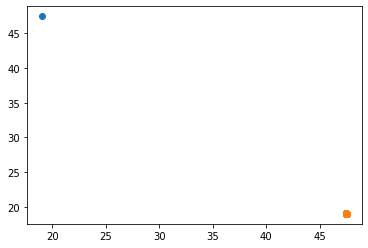

In [43]:
%matplotlib inline
circle2 = plt.Circle((I_building[1], I_building[0]), 0.00670390766103, color='b', fill=False)

ax = plt.gca()
ax.cla() # clear things for fresh plot
ax.scatter(I_building[1], I_building[0])
ax.scatter(y,x)


ax.add_patch(circle2)
plt.show()

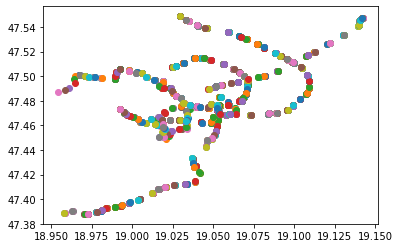

In [44]:
for i in pathways_7_8["geometry"]:
    plt.scatter(i.x,i.y)
plt.show()

In [45]:
#%pip install bokeh

In [46]:
#DATASHADER
import datashader as ds
from datashader import transfer_functions as tr_fns
#from datashader.bokeh_ext import InteractiveImage
from functools import partial
#from datashader.bokeh_ext import InteractiveImage
import colorcet as cc
import datashader.transfer_functions as tf

In [47]:
#making a df just for the data we need
geometry_x=[]
geometry_y=[]
for i in pathways_7_8["geometry"]:
    geometry_x.append(i.x)
    geometry_y.append(i.y)
              

In [48]:
#print(np.min(geometry_x), np.max(geometry_x)) -> for x_range
#print(np.min(geometry_y), np.max(geometry_y))
BP = x_range, y_range = ((18.954419, 19.142015), (47.387982, 47.548766))
plot_width = int(750)
plot_height = int(plot_width//1.2)
def base_plot(tools='pan, wheel_zoom, reset', plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
              x_range=x_range, y_range=y_range, outline_line_color=None,
              min_border=0, min_border_left=0, min_border_right=0,
              min_border_top=0, min_border_bottom=0, **plot_args)
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p
options = dict(line_color=None, fill_color='blue', size=5)

In [51]:
#samples = pathways_7_8.sample(n=1000)
#p = base_plot()
#p.circle(x=geometry_x, y=geometry_y, **options)
#show(p) #really cool interactive scatterplot open in browser
geometry_x_tuple=tuple(geometry_x)
geometry_y_tuple=tuple(geometry_y)
geometry_df=pd.DataFrame({
    'x_coor':geometry_x_tuple,
    'y_coor':geometry_y_tuple,
    'stop_name':pathways_7_8['stop_name']
})



In [52]:
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(geometry_df, 'x_coor', 'y_coor')
img = tr_fns.shade(agg, cmap=["white", 'darkblue'], how='linear')

In [54]:

#background = "black"
#export = partial(export_image, export_path="export", background=background)
#cm = partial(colormap_select, reverse=(background=="black"))
#cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
#agg = cvs.points(geometry_df, 'x_coor', 'y_coor')
#img = tr_fns.shade(agg, cmap=["white", 'darkblue'], how='linear')

#def create_image(x_range, y_range, w=plot_width, h=plot_height):
#    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
#    agg = cvs.points(geometry_df, 'x_coor', 'y_coor')
#    img = tr_fns.shade(agg, cmap=["white", 'darkblue'], how='linear')
#   return tr_fns.dynspread(img, threshold=0.5, max_px=4)

#p = base_plot(background_fill_color='black', plot_width=2259, plot_height=2259)
#export(create_image(*BP), "BP_hot")
#(p, create_image)
#lecci=ds.tf.set_background(ds.tf.shade(agg, cmap=cc.fire))
#looks cool: rainbow, coolwarm, bgy
#
#export(tf.shade(agg, cmap = cm(Greys9,0.01), how='linear'),"census_gray_linear")
#export(tf.shade(agg, cmap = cm(Greys9,0.01), how='log'),"census_gray_log")
#export(tf.shade(agg, cmap = cm(Greys9,0.2), how='eq_hist'),"census_gray_eq_hist")
#export(tf.shade(agg, cmap = cm(cc.fire,0.01), how='eq_hist'),"census_ds_fire_eq_hist")

In [55]:
pathways_7_8

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,route_id,...,shape_id,stop_name,stop_code,location_type,location_sub_type,parent_station,wheelchair_boarding,stop_direction,geometry,short_names
15126,C34268106997,009220,26400.0,26400.0,0,Széll Kálmán tér M,NaN,1,0.0,3060,...,B692,Móricz Zsigmond körtér M,NaN,NaN,NaN,NaN,1.0,NaN,POINT (19.04835 47.47750),6
15127,C34268106997,F02153,26520.0,26520.0,1,Széll Kálmán tér M,NaN,NaN,477.0,3060,...,B692,Budafoki út / Karinthy Frigyes út,NaN,NaN,NaN,NaN,1.0,114,POINT (19.05411 47.47583),6
15128,C34268106997,F02225,26580.0,26580.0,2,Széll Kálmán tér M,NaN,NaN,960.0,3060,...,B692,"Petőfi híd, budai hídfő",NaN,NaN,NaN,NaN,1.0,54,POINT (19.05959 47.47693),6
15129,C34268106997,F01374,26700.0,26700.0,3,Széll Kálmán tér M,NaN,NaN,1622.0,3060,...,B692,Boráros tér H,NaN,NaN,NaN,NaN,2.0,54,POINT (19.06670 47.48038),6
15130,C34268106997,F01380,26820.0,26820.0,4,Széll Kálmán tér M,NaN,NaN,1942.0,3060,...,B692,Mester utca / Ferenc körút,NaN,NaN,NaN,NaN,1.0,14,POINT (19.06885 47.48275),6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613364,C5478732344,F02527,30120.0,30120.0,27,Bécsi út / Vörösvári út,NaN,NaN,15414.0,3010,...,N087,Népfürdő utca / Árpád híd,NaN,NaN,NaN,NaN,1.0,-73,POINT (19.05887 47.53629),1
613365,C5478732344,F00626,30240.0,30240.0,28,Bécsi út / Vörösvári út,NaN,NaN,16515.0,3010,...,N087,Szentlélek tér H,NaN,NaN,NaN,NaN,1.0,-73,POINT (19.04521 47.53959),1
613366,C5478732344,F00614,30360.0,30360.0,29,Bécsi út / Vörösvári út,NaN,NaN,16981.0,3010,...,N087,Flórián tér,NaN,NaN,NaN,NaN,1.0,-50,POINT (19.03996 47.54152),1
613367,C5478732344,F00586,30420.0,30420.0,30,Bécsi út / Vörösvári út,NaN,NaN,17680.0,3010,...,N087,Óbudai rendelőintézet,NaN,NaN,NaN,NaN,1.0,-42,POINT (19.03346 47.54596),1


In [56]:
#function to make seconds to hours and minutes
def convert(seconds):
    seconds = seconds % (24 * 3600)
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
     
    return "%d:%02d:%02d" % (hour, minutes, seconds)


In [57]:
mmt=[]
ido = pathways_7_8['departure_time']
for i in ido:
    mmt.append(convert(i))
geometry_df['get_on'] = mmt

In [58]:
#7:50 is 28200 in seconds
t_to_school=[]
for t in ido:
    t_to_school.append(int((28200-t)/60))
geometry_df['time_to_school']=t_to_school

In [59]:
geometry_df

,x_coor,y_coor,stop_name,get_on,time_to_school
15126,19.048349,47.477499,Móricz Zsigmond körtér M,7:20:00,30
15127,19.054107,47.475827,Budafoki út / Karinthy Frigyes út,7:22:00,28
15128,19.059586,47.476933,"Petőfi híd, budai hídfő",7:23:00,27
15129,19.066698,47.480376,Boráros tér H,7:25:00,25
15130,19.068848,47.482751,Mester utca / Ferenc körút,7:27:00,23
...,...,...,...,...,...
613364,19.058868,47.536294,Népfürdő utca / Árpád híd,8:22:00,-32
613365,19.045207,47.539593,Szentlélek tér H,8:24:00,-34
613366,19.039960,47.541517,Flórián tér,8:26:00,-36
613367,19.033456,47.545957,Óbudai rendelőintézet,8:27:00,-37


In [77]:
#import pandas as pd
#!pip install plotly
import plotly.express as px
geometry_df=geometry_df.query('time_to_school>=0')
dff = geometry_df.query('y_coor < 47.548766').query('y_coor > 47.387982').query('x_coor > 18.954419').query('x_coor < 19.142015').query('time_to_school>10')
#bme_i = 47.47277215114886, 19.060034103922074
import plotly
#datashader steps
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(dff, x='x_coor', y='y_coor')
# agg is an xarray object, see http://xarray.pydata.org/en/stable/ for more details
coords_lat, coords_lon = agg.coords['y_coor'].values, agg.coords['x_coor'].values
# Corners of the image, which need to be passed to mapbox
coordinates = [[coords_lon[0], coords_lat[0]],
               [coords_lon[-1], coords_lat[0]],
               [coords_lon[-1], coords_lat[-1]],
               [coords_lon[0], coords_lat[-1]]]

from colorcet import fire
import plotly.graph_objects as go
import datashader.transfer_functions as tf
img = tf.shade(agg, cmap=fire)[::-1].to_pil()

import plotly.express as px
# Trick to create rapidly a figure with mapbox axes
fig = px.density_mapbox(geometry_df, lat=geometry_df.y_coor, lon= geometry_df.x_coor,zoom=12, hover_name='stop_name', 
                        hover_data=["x_coor", "y_coor",'time_to_school','get_on'], radius=5 )
#labels={'get_on':'get_on', 'time_to_school':'time_to_school'}
'''
fig = go.Densitymapbox(geometry_df, lat=geometry_df.y_coor, long= geometry_df.x_coor, hover_name='stop_name', 
                        hover_data=["x_coor", "y_coor"], labels={'get_on':'get on', 'time_to_school':'time to school'})
'''
#point to BME
fig.add_trace(go.Scattermapbox(
        lat=[47.47277215114886],
        lon=[19.060034103922074],
        marker=go.scattermapbox.Marker(
            size=10,
            color='rgb(0, 144, 144)',
            opacity=0.7
        ),
        text=["BME I Epulet"],
    ) )
# Add the datashader image as a mapbox layer image
fig.update_layout(mapbox_style="carto-darkmatter",
                 mapbox_layers = [
                {
                    "sourcetype": "image",
                    "source": img,
                    "coordinates": coordinates
                }]
)
fig.show()

In [63]:
#almost works, just leave it here just in case
#import zipfile
#with zipfile.ZipFile('map.zip', 'r') as zip_ref:
#    zip_ref.extractall()
#xml = pd.read_xml('map.xml')
#background = 'black'
#export = partial(export_image, export_path="export", background=background)
#cm = partial(colormap_select)
#reverse=(background=='black')
#cvs_bp = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
#agg_bp = cvs_bp.points(xml, 'lon', 'lat')
#img_bp = tr_fns.shade(agg, cmap=["white", 'darkblue'], how='linear')
#tiles = "BP_grey.png"

#export(create_image(*BP), "BP_hot")
#(p, create_image)
#bp=ds.tf.set_background(ds.tf.shade(agg_bp, cmap=cm(cc.gray,0.2)), "black")
#lines=ds.tf.set_background(ds.tf.shade(agg, cmap=cm(cc.fire,0.1)),)
#
#pls=np.multiply(bp,lines)
#bp*lines
#looks cool: rainbow, coolwarm, bgy
#
#export(tf.shade(agg, cmap = cm(Greys9,0.01), how='linear'),"census_gray_linear")
#export(tf.shade(agg, cmap = cm(Greys9,0.01), how='log'),"census_gray_log")
#export(tf.shade(agg, cmap = cm(Greys9,0.2), how='eq_hist'),"census_gray_eq_hist")
#export(tf.shade(agg, cmap = cm(cc.fire,0.01), how='linear'),"lines_fire")
#tf.Images(tf.shade(agg, name="lines"), 
#          tf.shade(agg_bp, name="bp"))
